# Kaggle Competition: Predicting Sale Price of Homes in Ames, Iowa

 ## Problem Statement

What is the best price to list a house in Ames, Iowa? As a real estate broker, it is important to know what price a client should list their home in order to obtain the most value and  for it to sell in a reasonable time. Our goal is to build a model using data from 2006-2010 to predict a baseline sale price for homes in Ames, Iowa that also provides manners in which the seller can increase the home’s value.


## Executive Summary

The goal of this project is to accurately predict the sale price of a home in Ames, Iowa by utilizing data cleaning, EDA, preprocessing and linear regression models. The datasets used were provided by Kaggle and contained a comprhensive list of over 2,500 homes sold in Ames, Iowa between 2006 and 2010. The datasets also included 79 different features of a home. This data provided the framework for our data analysis to find the features that could best predict sale price. 

Before building our model, we needed to understand the dataset in greater detail. In order to do this, we first cleaned the data to make sure there were no missing values and that all data types for each feature were correct. We turned the nominal categorical features into dummy variables and created a scale for the ordinal features.   

After cleaning the data, we wanted to understand the relationship between the features and sale price by looking for possible trends as well as collinearity. We examined histograms and scatter plots for the numerical features and looked at bar charts for the categorical features. It became clear when seeing the graphs that many of the numerical features distributions were skewed to the right and had a positive relationship with sale price, especially the features related to square footage. This makes sense. The larger the house, the higher the selling price. We noticed that several of the categorical features also had a positive relationship with sale price. For example, as the overall quality of a house increased, so did the sale price. 

After scaling the data and selecting features to include in our analysis, I began to build several linear regression models to predict the sale price of a home. The best model would have the lowest root mean squared error for the training and test data. The three models built utilized Linear, LASSO and Ridge regression. 


 ### Table of Contents
 
 1. [Imports](#Imports)
 2. [Data Dictionary](#Data-Dictionary)
 3. [Data Cleaning](#Data-Cleaning)
     - [Data Types](#Data-Types)
 4. [EDA](#EDA)
     - [Removing Outliers](#Removing-Outliers)
 5. [Feature Engineering](#Feature-Engineering)
 6. [Preprocessing and Modeling](#Preprocessing-and-Modeling)
 7. [Conclusions and Recommendations](#Conclusions-and-Recommendations)
 

 ## Imports

In [63]:
#importing packages

import pandas             as pd
import numpy              as np
import matplotlib.pyplot  as plt
import seaborn            as sns

from sklearn                 import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model    import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import mean_squared_error

sns.set_style("whitegrid")
%matplotlib inline

In [2]:
#Importing the data sets
df_train = pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv')


In [3]:
#Taking first look at training data set
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
#ID is a unique identifier. Turning that into index id for each row
df_train.set_index('Id', inplace = True) 
df_test.set_index('Id', inplace = True)

In [5]:
#Shape of train data
df_train.shape

(2051, 80)

In [6]:
#first look at test data test. Same columns except missing Sale price
df_test.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [7]:
#shape of test data
df_test.shape

(879, 79)

In [7]:
#Looking at all the training columns as an array.
df_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [8]:
set(df_train.columns) - set(df_test.columns)

{'SalePrice'}

Sales Price is the only column omitted from the test data which makes sense since this is what we are trying to predict.

 ## Data Dictionary
 - [Original Features](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) 
 
 - New Features
 ---
|Feature|Type|Dataset|Description|
|---|---|---|---|
|Inside_SF|float|Training/Test|Sum of square footage inside a home|
|Bsmt Qual * Bsmt Cond|float|Training/Test|Interaction term between basement quality and condition|
|Fireplaces * Fireplace Qu|float|Training/Test|Interaction term between fireplaces and fireplace quality|
|Gareage Area * Garage Cond|float|Training/Test|Interaction term between garage area and condition|


 ## Data Cleaning
 
  - First I'm going to take a look at all of the null values in both data sets.
  - Second I will make sure all the data types are correct.

In [9]:
#looking at number of null values in the data set by %
df_train.isnull().mean().sort_values(ascending = False).head()

Pool QC         0.995612
Misc Feature    0.968308
Alley           0.931741
Fence           0.804973
Fireplace Qu    0.487567
dtype: float64

In [10]:
df_test.isnull().mean().sort_values(ascending = False).head()

Pool QC         0.995449
Misc Feature    0.953356
Alley           0.934016
Fence           0.804323
Fireplace Qu    0.480091
dtype: float64

Pool quality, miscenllaneous features, fence quality, and alley access have over 80% missing values in the test and training data. I am going to remove those columns from the data set as they will have little significance when predicting price.  

In [11]:
#Dropping several columns that have over 80% missing values
df_train.drop(columns = ['Pool QC', 'Misc Feature', 'Alley', 'Fence'], inplace = True)
df_test.drop(columns = ['Pool QC', 'Misc Feature', 'Alley', 'Fence'], inplace = True)


In [12]:
#Remaining null values
df_train.isnull().mean().sort_values(ascending = False).head()

Fireplace Qu     0.487567
Lot Frontage     0.160897
Garage Yr Blt    0.055583
Garage Finish    0.055583
Garage Qual      0.055583
dtype: float64

In [13]:
#remaining null values
df_test.isnull().mean().sort_values(ascending = False).head()

Fireplace Qu     0.480091
Lot Frontage     0.182025
Garage Qual      0.051195
Garage Cond      0.051195
Garage Yr Blt    0.051195
dtype: float64

In [14]:
#Filling in missing values in fireplace column with 0. 0 equals no fireplace
df_train['Fireplace Qu'].fillna(0, inplace = True)
df_test['Fireplace Qu'].fillna(0, inplace = True)

In [15]:
#Filling NaN's with mean of existing values for Lot Frontage
df_train['Lot Frontage'].fillna(df_train['Lot Frontage'].mean(), inplace = True)
df_test['Lot Frontage'].fillna(df_test['Lot Frontage'].mean(), inplace = True)

In [16]:
#Filling in missing values in Garage quality and condition columns with 0. 0 means no garage
df_train['Garage Qual'].fillna(0, inplace = True)
df_train['Garage Cond'].fillna(0, inplace = True)

df_test['Garage Qual'].fillna(0, inplace = True)
df_test['Garage Cond'].fillna(0, inplace = True)


In [17]:
#Filling all NaNs for Garage type to none. This is a nominal variable
df_train['Garage Type'].fillna('None', inplace = True)
df_test['Garage Type'].fillna('None', inplace = True)


In [18]:
#Filling all NaNs for Garage finish to zero for ordinal scale. 
df_train['Garage Finish'].fillna(0, inplace = True)
df_test['Garage Finish'].fillna(0, inplace = True)


In [19]:
#Garage Year built for ID 2261 is listed at 2207. Going to update to 2007.
df_train['Garage Yr Blt'].sort_values(ascending = False).head()

Id
2261    2207.0
105     2010.0
317     2010.0
528     2009.0
434     2009.0
Name: Garage Yr Blt, dtype: float64

In [26]:
#code to update year
df_train.loc[2261, 'Garage Yr Blt'] = 2007


In [27]:
#Filling NaN's with mean of existing values Garage Year Buily
df_train['Garage Yr Blt'].fillna(df_train['Garage Yr Blt'].mean(), inplace = True)
df_test['Garage Yr Blt'].fillna(df_test['Garage Yr Blt'].mean(), inplace = True)

In [28]:
#Filling in missing values in Basement quality and condition columns with 0.
df_train['Bsmt Qual'].fillna(0, inplace = True)
df_train['Bsmt Cond'].fillna(0, inplace = True)

df_test['Bsmt Qual'].fillna(0, inplace = True)
df_test['Bsmt Cond'].fillna(0, inplace = True)


In [29]:
#Filling all NaNs for Masrony Veneer type to none. This is a nominal variable
df_train['Mas Vnr Type'].fillna('None', inplace = True)
df_test['Mas Vnr Type'].fillna('None', inplace = True)

#Filling all NaNs for Masrony Veneer area with the current mean of the column 
df_train['Mas Vnr Area'].fillna(df_train['Mas Vnr Area'].mean(), inplace = True)
df_test['Mas Vnr Area'].fillna(df_test['Mas Vnr Area'].mean(), inplace = True)



In [30]:
#Filling all NaNs for Basement full bath to 0. Discrete variable
df_train['Bsmt Full Bath'].fillna(0, inplace = True)
df_test['Bsmt Full Bath'].fillna(0, inplace = True)

#Filling all NaNs for Basement half bath to 0. Discrete variable
df_train['Bsmt Half Bath'].fillna(0, inplace = True)
df_test['Bsmt Half Bath'].fillna(0, inplace = True)


In [31]:
#Filling all NaNs for Total Basement SF with current mean. Continuous variable
df_train['Total Bsmt SF'].fillna(df_train['Total Bsmt SF'].mean(), inplace = True)
df_test['Total Bsmt SF'].fillna(df_test['Total Bsmt SF'].mean(), inplace = True)

#Filling all NaNs for garage area with current mean. Continuous variable
df_train['Garage Area'].fillna(df_train['Garage Area'].mean(), inplace = True)
df_test['Garage Area'].fillna(df_test['Garage Area'].mean(), inplace = True)

In [32]:
#Filling all NaNs for Basement exposure to none. This is an ordinal variable
df_train['Bsmt Exposure'].fillna('None', inplace = True)
df_test['Bsmt Exposure'].fillna('None', inplace = True)

#Filling all NaNs for Basement Finish type 1 to none. This is a ordinal variable
df_train['BsmtFin Type 1'].fillna('None', inplace = True)
df_test['BsmtFin Type 1'].fillna('None', inplace = True)

#Filling all NaNs for Basement Finish type 2 to none. This is a ordinal variable
df_train['BsmtFin Type 2'].fillna('None', inplace = True)
df_test['BsmtFin Type 2'].fillna('None', inplace = True)

In [33]:
#Filling all NaNs for Basement SF 1 to mean of column. Continuous variable
df_train['BsmtFin SF 1'].fillna(df_train['BsmtFin SF 1'].mean(), inplace = True)
df_test['BsmtFin SF 1'].fillna(df_test['BsmtFin SF 1'].mean(), inplace = True)

#Filling all NaNs for basement SF 2 to mean of column. Continuous variable
df_train['BsmtFin SF 2'].fillna(df_train['BsmtFin SF 2'].mean(), inplace = True)
df_test['BsmtFin SF 2'].fillna(df_test['BsmtFin SF 2'].mean(), inplace = True)

#Filling all NaNs for Basement SF Unf to mean of column. Continuous variable
df_train['Bsmt Unf SF'].fillna(df_train['Bsmt Unf SF'].mean(), inplace = True)
df_test['Bsmt Unf SF'].fillna(df_test['Bsmt Unf SF'].mean(), inplace = True)

In [34]:
#Filling all NaNs for Garage Cars to 0. Discrete variable
df_train['Garage Cars'].fillna(0, inplace = True)
df_test['Garage Cars'].fillna(0, inplace = True)

In [35]:
#No more missing values
df_train.isnull().sum().sum()

0

In [36]:
#There is one more null value in the test set that I need to take care of.
df_test.isnull().sum().sort_values(ascending = False).head()

Electrical    1
Sale Type     0
Exter Cond    0
Roof Style    0
Roof Matl     0
dtype: int64

In [40]:
df_test['Electrical'].value_counts(normalize = True)

SBrkr    0.927107
FuseA    0.054670
FuseF    0.017084
FuseP    0.001139
Name: Electrical, dtype: float64

In [41]:
#Filling lone NaN with SBrkr for electrical column. That's the most common option.
df_test['Electrical'].fillna('SBrkr', inplace = True)

 ### Data Types
Making sure data types are correct for each column

In [42]:
#All of the data types look good besides MS Subclass. This should be an object since it is a nominal category.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 76 columns):
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       2051 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2051 non-null object
Exterior 1st       

In [43]:
df_train['MS SubClass'] = df_train['MS SubClass'].astype('object')
df_test['MS SubClass'] = df_test['MS SubClass'].astype('object')

 ## EDA

In [44]:
#Creating two lists of features for categorical and numerical variables
numerical_variables = list(df_train.select_dtypes([np.number]).columns.values)
categorical_variables = list(df_train.select_dtypes('object').columns.values)

### Numerical Features

In [54]:
#Created a function below to create histograms for many features.
def make_a_bunch_of_histograms(list_of_columns):
    fig   = plt.figure(figsize = (20, 40))      # Set the size for each plot
    count = 0                                   # The count sets the location for each subplot
    for column in list_of_columns:
        count += 1                              # By adding 1 to the count I can create a new location for the graph
        ax = fig.add_subplot(13, 3, count)
        plt.title(column, size = 18)
        df_train.hist(column = column, ax = ax, figsize = (10,12)); #creating histograms for the training data


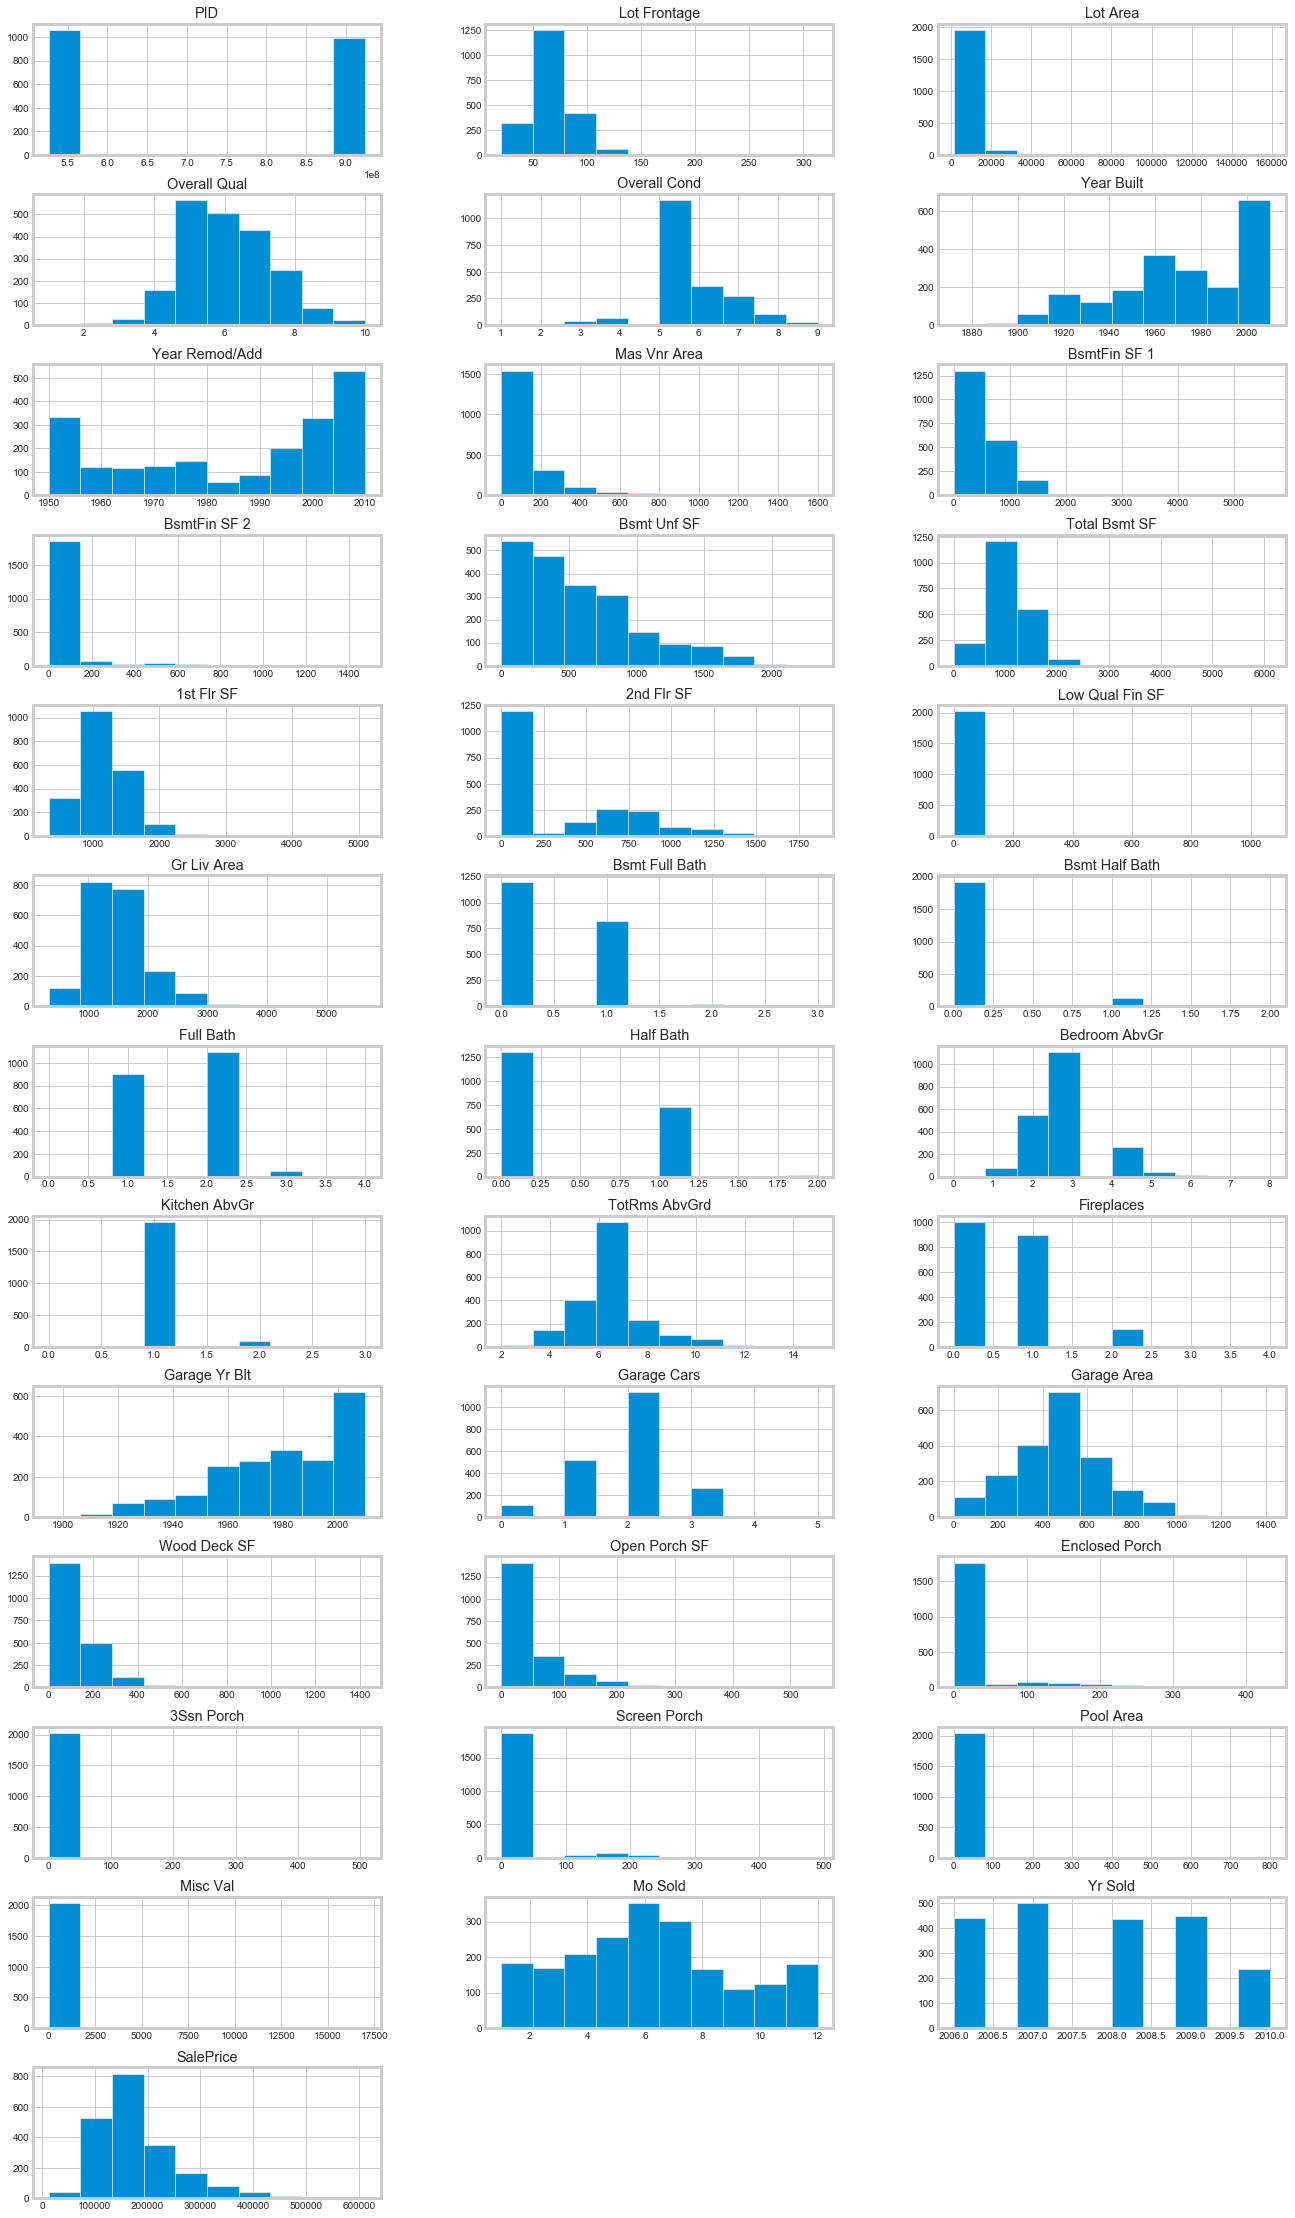

In [56]:
#Created histograms for the numerical variables to look at distributions.
make_a_bunch_of_histograms(numerical_variables)

Many of the features are skewed to the right and do not have normal distributions. This also includes sale price.

In [89]:
#Making a function for scatter plots in the same manner as the histograms.
def make_a_bunch_of_scatterplots(list_of_columns):
    fig   = plt.figure(figsize = (20, 80))  
    count = 0                                          
    for column in list_of_columns:
        count += 1                                     
        ax = fig.add_subplot(13, 3, count)
        plt.title(column, size = 18)
        plt.ylabel("Sale Price", size = 14)
        plt.xlabel(column, size = 14)
        plt.xticks(size = 12)
        sns.scatterplot(x = column, y = "SalePrice", data = df_train, sizes = (15,20))


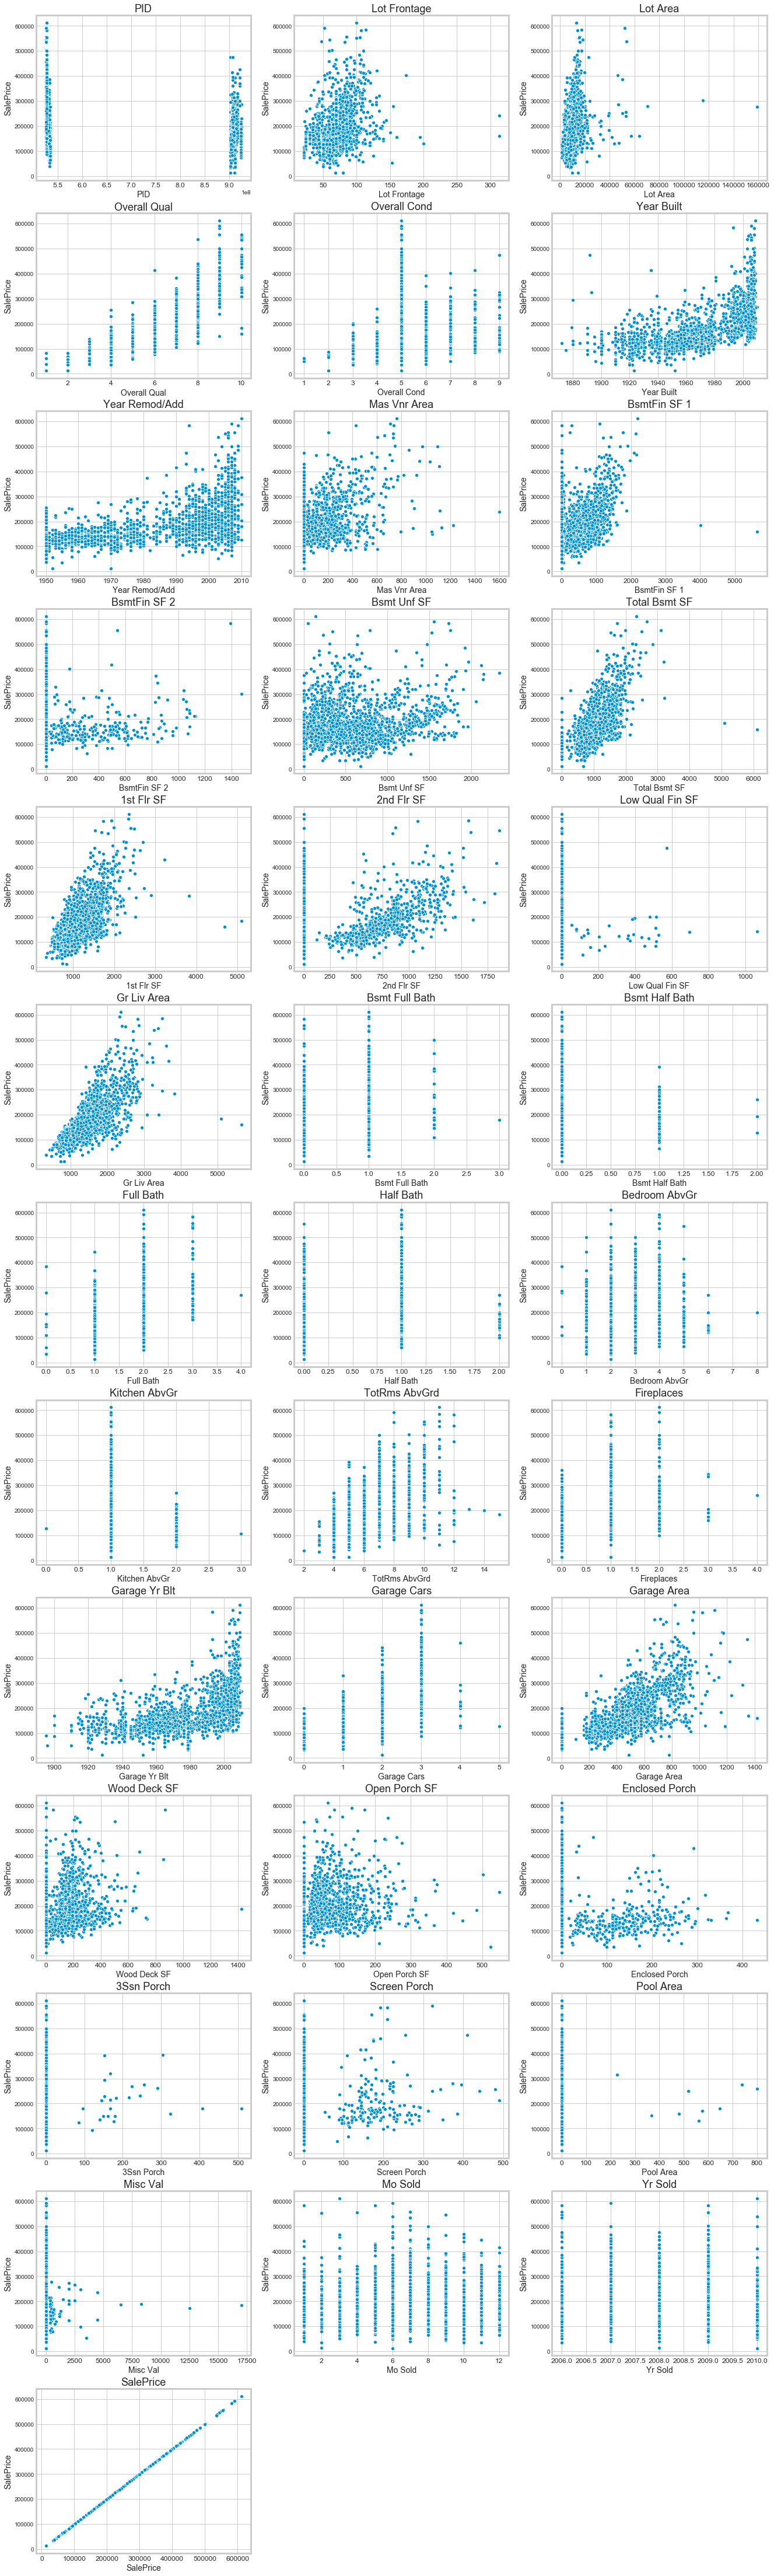

In [90]:
make_a_bunch_of_scatterplots(numerical_variables)

Many of the scatter plots have a positive linear relationship with sales price. This includes many of the square footage features. The larger the area of a house, the higher the sale price will be. I was also able to spot several features that have outliers that I will remove later on.

#### Investigating Target Variable: Sales Price

In [59]:
df_train[['SalePrice']].describe()

,SalePrice
count,2051.000000
mean,181469.701609
std,79258.659352
min,12789.000000
25%,129825.000000
50%,162500.000000
75%,214000.000000
max,611657.000000


Sale Price looks to be skewed to the right since the mean is greater than the median. We will look at this visually to get a better sense of the distribution.

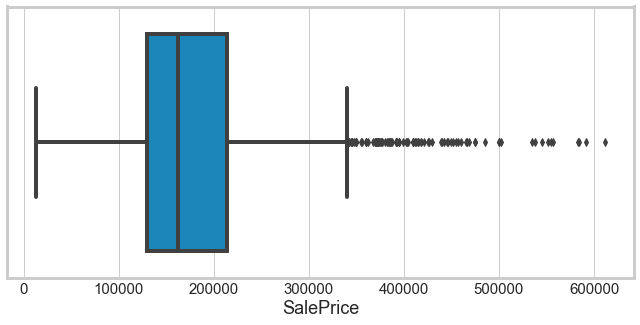

In [64]:
#Boxplot of Sale Price
plt.figure(figsize= (10,5))
sns.boxplot(df_train['SalePrice'])
plt.xticks(size = 15)
plt.xlabel('SalePrice', size = 18);

Looks like there are outliers to the right.

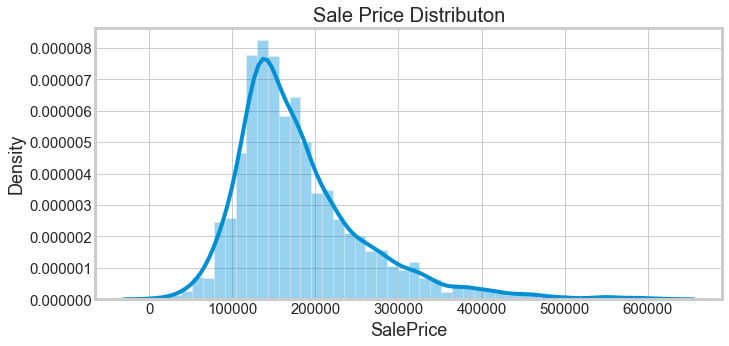

In [72]:
#Histogram of SalePrice
plt.figure(figsize=(10,5))
sns.distplot(df_train['SalePrice'])
plt.title('Sale Price Distributon', size = 20)
plt.xlabel('SalePrice', size = 18)
plt.ylabel('Density', size = 18)
plt.xticks(size = 15)
plt.yticks(size = 15);

The plot is close to being normally distributed but is skewed to the right. We will take a look at the log distribution to see if it becomes normal.

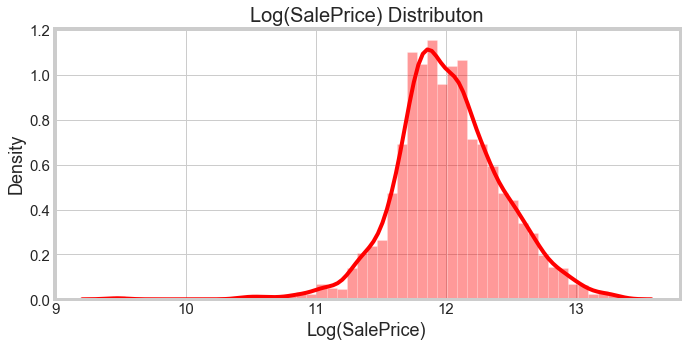

In [80]:
#Histogram of Log SalePrice
plt.figure(figsize=(10,5))
sns.distplot(np.log(df_train['SalePrice']), color = 'red')
plt.title('Log(SalePrice) Distributon', size = 20)
plt.xlabel('Log(SalePrice)', size = 18)
plt.ylabel('Density', size = 18)
plt.xticks(size = 15)
plt.yticks(size = 15);

This transformation adjusts the distribution of SalePrice to be normal and removes some of the impact of the outliers. This suggests that we should model our data against the Log(SalePrice).

### Categorical Features

In [100]:
#Making a function for scatter plots in the same manner as the histograms.
def make_a_bunch_of_barplots(list_of_columns):
    fig   = plt.figure(figsize = (20, 85))  
    count = 0                                          
    for column in list_of_columns:
        count += 1                                     
        ax = fig.add_subplot(20, 3, count)
        plt.title(column, size = 18)
        plt.ylabel("Sale Price", size = 14)
        plt.xlabel(column, size = 14)
        plt.xticks(size = 12)
        sns.barplot(x = column, y = "SalePrice", data = df_train, ci = None)
        plt.tight_layout();
 

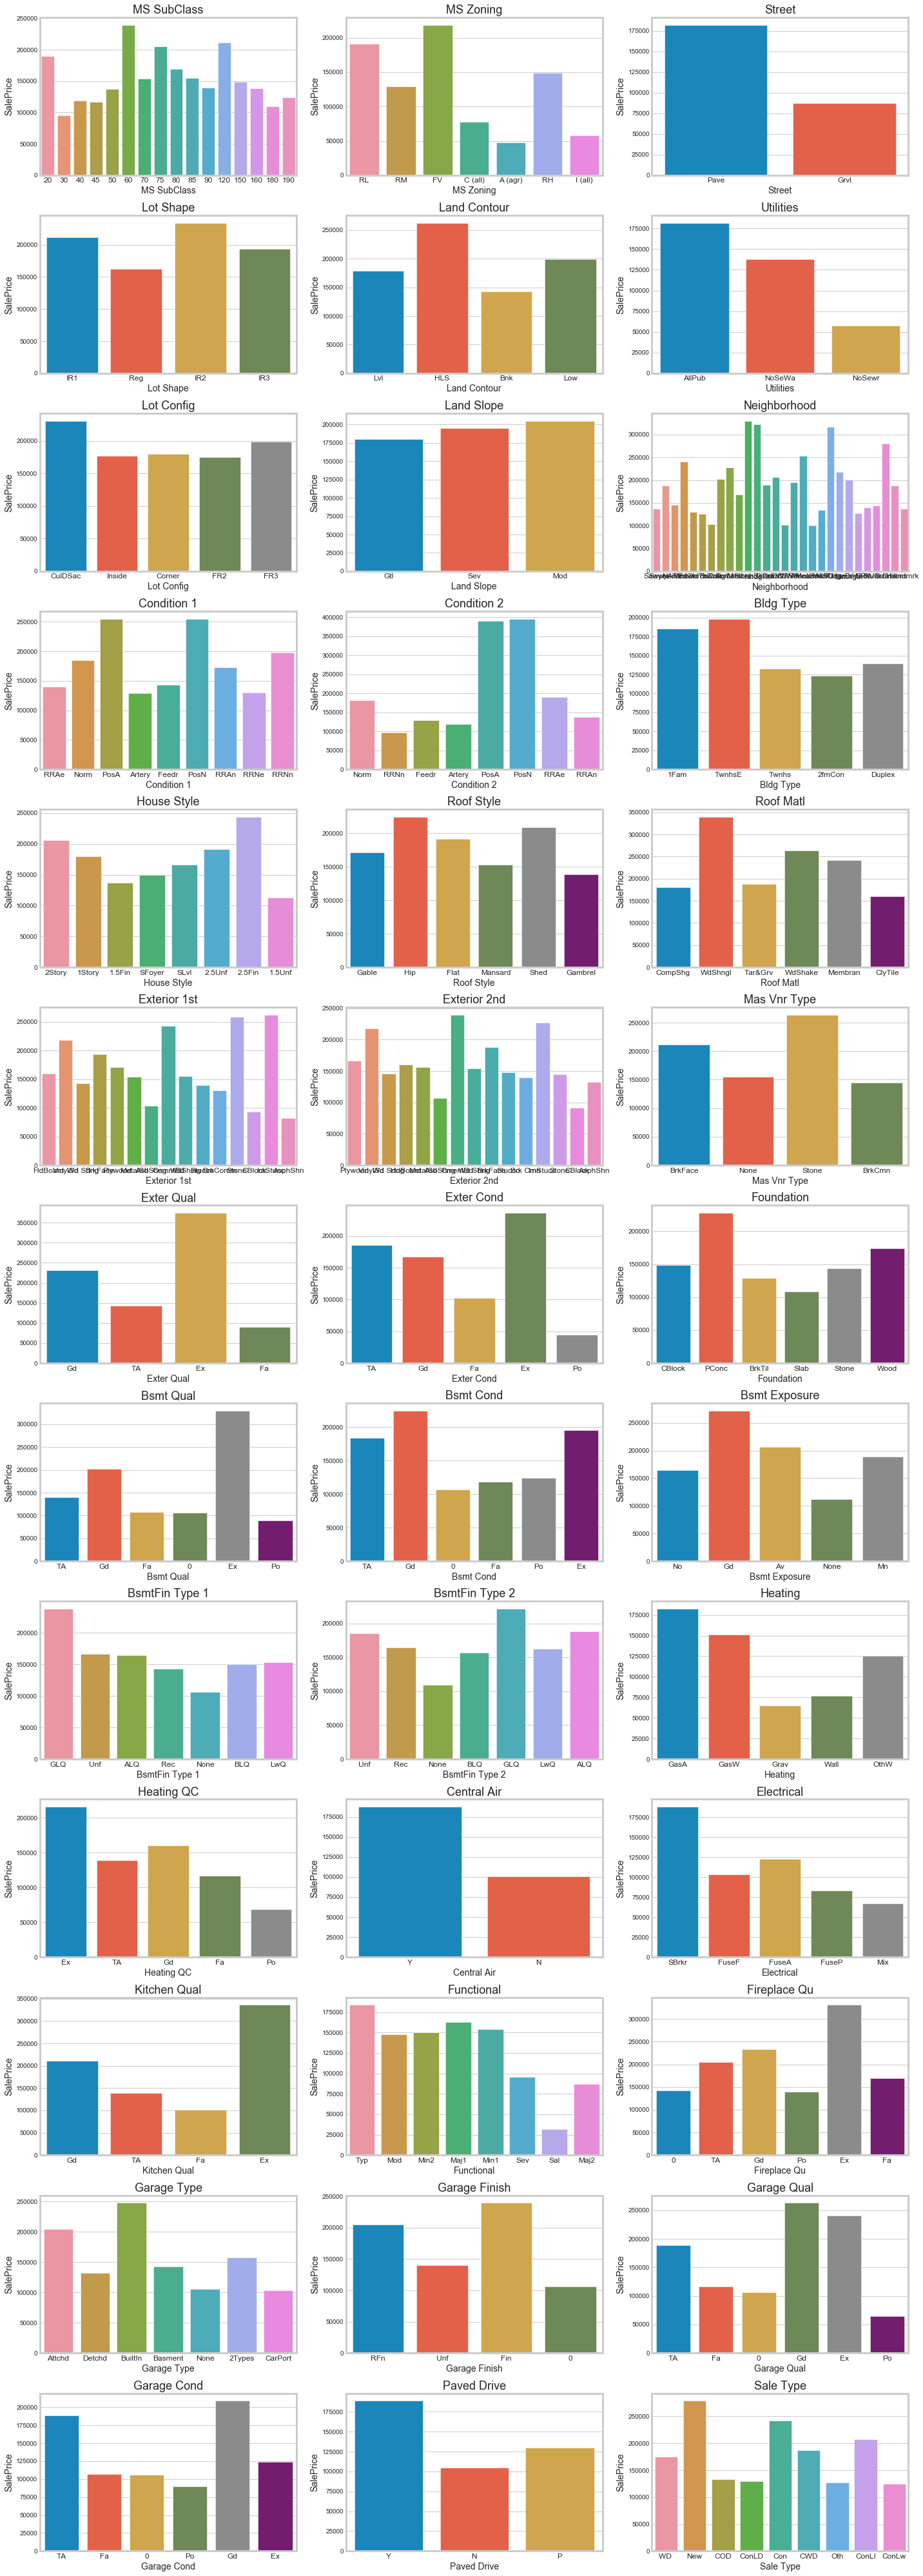

In [101]:
#creating scatter plots for the categorical variables
make_a_bunch_of_barplots(categorical_variables)

After looking at the bar charts, not all of them seem to have a distinct relationship with sales price. However, categories related to condition and to quality have a positive relationship. The better the quality and condition, the higher the sale price.

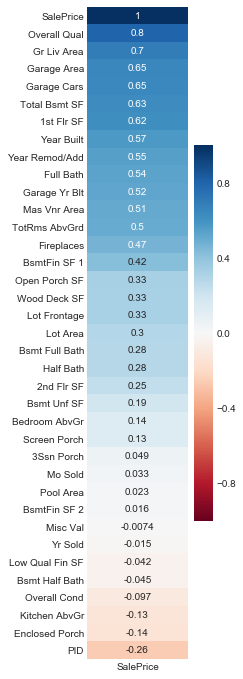

In [103]:
#Looking at heatmap for nominal variables versus sales price sorted from least to greatest
plt.figure(figsize = (2,12))

sns.heatmap(df_train.corr()[['SalePrice']].sort_values('SalePrice', ascending = False), 
            annot = True, 
            cmap = 'RdBu',
            vmin = -1);

As expected, the features related to square footage and quality have the highest correlation with sales price.

 ### Removing Outliers

We are going to remove large outiers from features after examining the scatter plots.

In [104]:
#Dropping outliers in Lot Area by only including rows that have less than 100000 SF
df_train = df_train[df_train['Lot Area'] < 100000]

In [105]:
#Dropping outliers in Bsmt Fin SF 1 by only including rows that have less than 4000 SF
df_train = df_train[df_train['BsmtFin SF 1'] < 4000]

In [106]:
#Dropping outliers in Bsmt Fin SF 2 by only including rows that have less than 1300 SF
df_train = df_train[df_train['BsmtFin SF 2'] < 1300]

In [107]:
#Dropping outliers in Low Qual Fin SF by only including rows that have less than 1000 SF
df_train = df_train[df_train['Low Qual Fin SF'] < 1000]

In [108]:
#Dropping outliers in Lot Frontage by only including rows that have less than 300 SF
df_train = df_train[df_train['Lot Frontage'] < 300]

In [109]:
#Dropping outliers in Mas Vnr Area by only including rows that have less than 1500 SF
df_train = df_train[df_train['Mas Vnr Area'] < 1500]

In [110]:
#Dropping outliers in 1st flr Area by only including rows that have less than 3500 SF
df_train = df_train[df_train['1st Flr SF'] < 3500]

In [111]:
#Dropping outliers in 1st flr Area by only including rows that have less than 1500 SF
df_train = df_train[df_train['Wood Deck SF'] < 1400]

 ## Feature Engineering
We are first going to create dummy variables for the categorical variables and then overwrite the ordinal features that have an implied order with a numeric scale to better fit the regression models.


In [115]:
#Creating a list of all the features that will need dummy variables
dummy_columns = ['Garage Finish',
              'MS SubClass',
              'Mas Vnr Type',
              'MS Zoning', 
              'Street', 
              'Land Contour', 
              'Lot Config',
              'Neighborhood',
              'Condition 1', 
              'Condition 2', 
              'Bldg Type',
              'House Style',
              'Roof Style',
              'Roof Matl',
              'Exterior 1st',
              'Exterior 2nd', 
              'Foundation',
              'Heating', 
              'Central Air', 
              'Garage Type', 
              'Sale Type']

#Creating dummy variables for the columns above
df_train = pd.get_dummies(data = df_train, columns = dummy_columns, drop_first = True)
df_test = pd.get_dummies(data = df_test, columns = dummy_columns, drop_first = True)


Now we will create scales for the ordinal variables by making a dictionary and mapping them to the columns.

In [116]:
# Dictionary for Ordinal variables that have the same categories. 

qual_cond_dict = {0: 0, 
                 'Po': 1,
                 'Fa': 2,
                 'TA': 3,
                 'Gd': 4,
                 'Ex': 5}

#List of columns with the same categories
qual_cond_columns = ['Fireplace Qu', 
                     'Garage Qual', 
                     'Garage Cond', 
                     'Bsmt Qual',
                     'Bsmt Cond', 
                     'Exter Qual', 
                     'Exter Cond', 
                     'Heating QC', 
                     'Kitchen Qual']


In [117]:
#Loop to map the dictionary to the columns
for column in qual_cond_columns:
    df_train[column] = df_train[column].map(qual_cond_dict)
    df_test[column]  = df_test[column].map(qual_cond_dict)

In [118]:
df_train['Bsmt Exposure'].value_counts()

No      1337
Av       288
Gd       195
Mn       163
None      57
Name: Bsmt Exposure, dtype: int64

In [119]:
#Created dictionary to map
bsmt_exposure_dict = {'None': 0, 
                    'No': 1,
                    'Mn': 2,
                    'Av': 3,
                    'Gd': 4}

#mapping ordinal scale to the columns
df_train['Bsmt Exposure'] = df_train['Bsmt Exposure'].map(bsmt_exposure_dict)
df_test['Bsmt Exposure'] = df_test['Bsmt Exposure'].map(bsmt_exposure_dict)


In [120]:
#Created dictionary to map for BsmtFin Type 1 and 2
bsmt_fintype_dict = {'None': 0, 
                    'Unf': 1,
                    'LwQ': 2,
                    'Rec': 3,
                    'BLQ': 4,
                    'ALQ': 5,
                    'GLQ': 6}

#mapping ordinal scale to the columns
df_train['BsmtFin Type 1'] = df_train['BsmtFin Type 1'].map(bsmt_fintype_dict)
df_test['BsmtFin Type 1'] = df_test['BsmtFin Type 1'].map(bsmt_fintype_dict)

df_train['BsmtFin Type 2'] = df_train['BsmtFin Type 2'].map(bsmt_fintype_dict)
df_test['BsmtFin Type 2'] = df_test['BsmtFin Type 2'].map(bsmt_fintype_dict)


In [121]:
electrical_dict = {'None': 0, 
                    'Mix': 1,
                    'FuseP': 2,
                    'FuseF': 3,
                    'FuseA': 4,
                    'SBrkr': 5,
                    }

#mapping ordinal scale to the columns
df_train['Electrical'] = df_train['Electrical'].map(electrical_dict)
df_test['Electrical'] = df_test['Electrical'].map(electrical_dict)

In [122]:
lotshape_dict = {'IR3': 1, 
                 'IR2': 2,
                 'IR1': 3,
                 'Reg': 4,}

#mapping ordinal scale to the columns
df_train['Lot Shape'] = df_train['Lot Shape'].map(lotshape_dict)
df_test['Lot Shape'] = df_test['Lot Shape'].map(lotshape_dict)

In [123]:
utilities_dict = {'ELO': 1, 
                 'NoSeWa': 2,
                 'NoSewr': 3,
                 'AllPub': 4,}

#mapping ordinal scale to the columns
df_train['Utilities'] = df_train['Utilities'].map(utilities_dict)
df_test['Utilities'] = df_test['Utilities'].map(utilities_dict)

In [124]:
landslope_dict = {'Sev': 1, 
                 'Mod': 2,
                 'Gtl': 3}

#mapping ordinal scale to the columns
df_train['Land Slope'] = df_train['Land Slope'].map(landslope_dict)
df_test['Land Slope'] = df_test['Land Slope'].map(landslope_dict)

In [125]:
functional_dict = {'Sal': 0, 
                   'Sev': 1,
                   'Maj2': 2,
                   'Maj1': 3,
                   'Mod': 4,
                   'Min2': 5,
                   'Min1': 6,
                   'Typ': 7}

#mapping ordinal scale to the columns
df_train['Functional'] = df_train['Functional'].map(functional_dict)
df_test['Functional'] = df_test['Functional'].map(functional_dict)

In [126]:
paved_dict = {'N': 0, 
              'P': 1,
              'Y': 2}

#mapping ordinal scale to the columns
df_train['Paved Drive'] = df_train['Paved Drive'].map(paved_dict)
df_test['Paved Drive'] = df_test['Paved Drive'].map(paved_dict)

In [127]:
#Checking shape of training and test data to make sure they're the same number of columns
print(df_train.shape)
print(df_test.shape)

(2040, 204)
(879, 196)


We need to include the 8 missing columns in the test data set so the model can run. The discrepancies are caused when the dummy variables are created when some of the instances aren't in the test data.

In [141]:
# Get the exclusive columns from each set
train_only = set(df_train.columns) - set(df_test.columns)
test_only = set(df_test.columns) - set(df_train.columns)
    
#dropping SalePrice from train_only set
train_only.remove('SalePrice')
    
# Append the missing columns to the dataframes
for test_col in test_only:
    df_train[test_col] = 0
for train_col in train_only:
    df_test[train_col] = 0
        
# Maintain same column order between two dataframes
df_test = df_test[df_train.columns.drop('SalePrice')]

In [143]:
#Checking Results
print(df_test.shape)
print(df_train.shape)

(879, 211)
(2040, 212)


 ### Creating New Columns

 #### Interaction Columns

We are going to create several interaction columns from similar features to see if they will add any value to the model. For example, `Inside_SF` will be a combination of all the features that include square footage from inside the home. This will give us a value for the total square footage inside the house.

In [144]:
# Creating interaction terms for train and test 
df_train['Inside_SF'] = df_train['1st Flr SF'] + df_train['2nd Flr SF'] + df_train['Total Bsmt SF'] + df_train['Garage Area']
df_train['Bsmt Qual * Bsmt Cond'] = df_train['Bsmt Qual'] * df_train['Bsmt Cond']
df_train['Fireplaces * Fireplace Qu'] = df_train['Fireplaces'] * df_train['Fireplace Qu']
df_train['Garage Area * Garage Cond'] = df_train['Garage Area'] * df_train['Garage Cond']

df_test['Inside_SF'] = df_test['1st Flr SF'] + df_test['2nd Flr SF'] + df_test['Total Bsmt SF'] + df_test['Garage Area']
df_test['Bsmt Qual * Bsmt Cond'] = df_test['Bsmt Qual'] * df_test['Bsmt Cond']
df_test['Fireplaces * Fireplace Qu'] = df_test['Fireplaces'] * df_test['Fireplace Qu']
df_test['Garage Area * Garage Cond'] = df_test['Garage Area'] * df_test['Garage Cond']



 ## Preprocessing and Modeling

In [147]:
#Features including everything but saleprice
feats = df_train.drop('SalePrice', axis = 1).columns.values

In [167]:
#Assigning X and Y variable to respective features
X = df_train[feats]
y = np.log(df_train['SalePrice'])

In [163]:
X.head()

,PID,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Exterior 1st_PreCast,Roof Matl_Roll,Exterior 2nd_Other,Sale Type_VWD,Heating_GasA,Roof Matl_Metal,Inside_SF,Bsmt Qual * Bsmt Cond,Fireplaces * Fireplace Qu,Garage Area * Garage Cond
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,69.0552,13517,3,4,3,6,8,1976,2005,...,0,0,0,0,0,0,2679.0,9,0,1425.0
544,531379050,43.0000,11492,3,4,3,7,5,1996,1997,...,0,0,0,0,0,0,3594.0,12,3,1677.0
153,535304180,68.0000,7922,4,4,3,5,7,1953,2007,...,0,0,0,0,0,0,2360.0,9,0,738.0
318,916386060,73.0000,9802,4,4,3,5,5,2006,2007,...,0,0,0,0,0,0,2228.0,12,0,1200.0
255,906425045,82.0000,14235,3,4,3,6,8,1900,1993,...,0,0,0,0,0,0,2605.0,8,0,1452.0


In [168]:
#train-Test split to cross-validate model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [169]:
#looking at the shapes of the training and test data
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print('')
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(2040, 215)
(1530, 215)
(510, 215)

(2040,)
(1530,)
(510,)


 ### Scaling

In [170]:
#Scaling the data by fitting to the training set to get mean and standard deviation.
ss = StandardScaler()
ss.fit(X_train) 
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

 ### Linear Regression

In [154]:
#instantiate
lr = LinearRegression()

#fit
model = lr.fit(X_train, y_train)

#predictions

y_hat_lr_train = np.exp(model.predict(X_train))
y_hat_lr_test = np.exp(model.predict(X_test))

# Analyzing metrics
print("The Train RMSE Score for this model is:",  np.sqrt(mean_squared_error(np.exp(y_train) , y_hat_lr_train)))
print("The Test RMSE Score for this model is:",  np.sqrt(mean_squared_error(np.exp(y_test), y_hat_lr_test)))
print("The Train MSE Score for this model is:", mean_squared_error(np.exp(y_train) , y_hat_lr_train))
print("The Test MSE Score for this model is:",  mean_squared_error(np.exp(y_test), y_hat_lr_test))
print("The Train Mean Abs Error Score for this model is:",  metrics.mean_absolute_error(np.exp(y_train), y_hat_lr_train))
print("The Test Mean Abs Error Score for this model is:",  metrics.mean_absolute_error(np.exp(y_test), y_hat_lr_test))
print("The Train R^2 Score for this model is:",  model.score(X_train, y_train))
print("The Test R^2 Score for this model is:",  model.score(X_test, y_test))
print("The Train Cross Validation Score for this model is:", cross_val_score(lr,X_train, y_train, cv=5).mean())
print("The Test Cross Validation for this model is:", cross_val_score(lr,X_test, y_test, cv=5).mean())


The Train RMSE Score for this model is: 16464.43139615822
The Test RMSE Score for this model is: 24365.757872745962
The Train MSE Score for this model is: 271077501.1988005
The Test MSE Score for this model is: 593690156.7132818
The Train Mean Abs Error Score for this model is: 11156.421008707403
The Test Mean Abs Error Score for this model is: 14205.655638421082
The Train R^2 Score for this model is: 0.954418925191328
The Test R^2 Score for this model is: 0.8587418684971642
The Train Cross Validation Score for this model is: 0.8934085992407633
The Test Cross Validation for this model is: 0.7895438758608739


The linear regression model has a high r^2 score on the training set, but the model looks to be overfit due to the large discrepancy between the training and test scores. The test score is lower than the training score by a considerable amount. We will see if a Ridge or LASSO regression can correct this. 

 ### LASSO Regression

In [171]:
#instantiating lasso model
lasso = LassoCV(cv = 5)

#Fitting lasso model using scaled data
lasso.fit(X_train_sc, y_train)

#Predicted values using Lasso model
y_hat_lasso_train = np.exp(lasso.predict(X_train_sc))
y_hat_lasso_test = np.exp(lasso.predict(X_test_sc))

# Analyzing metrics
print("The Train RMSE Score for this model is:",  np.sqrt(mean_squared_error(np.exp(y_train) , y_hat_lasso_train)))
print("The Test RMSE Score for this model is:",  np.sqrt(mean_squared_error(np.exp(y_test), y_hat_lasso_test)))
print("The Train MSE Score for this model is:", mean_squared_error(np.exp(y_train) , y_hat_lasso_train))
print("The Test MSE Score for this model is:",  mean_squared_error(np.exp(y_test), y_hat_lasso_test))
print("The Train Mean Abs Error Score for this model is:",  metrics.mean_absolute_error(np.exp(y_train), y_hat_lasso_train))
print("The Test Mean Abs Error Score for this model is:",  metrics.mean_absolute_error(np.exp(y_test), y_hat_lasso_test))
print("The Train R^2 Score for this model is:",  lasso.score(X_train_sc, y_train))
print("The Test R^2 Score for this model is:",  lasso.score(X_test_sc, y_test))


The Train RMSE Score for this model is: 17621.84407533945
The Test RMSE Score for this model is: 18558.897888547617
The Train MSE Score for this model is: 310529388.615576
The Test MSE Score for this model is: 344432690.83753717
The Train Mean Abs Error Score for this model is: 11971.582504415295
The Test Mean Abs Error Score for this model is: 13422.440349971752
The Train R^2 Score for this model is: 0.9424838177179643
The Test R^2 Score for this model is: 0.8847324484201725


The LASSO scores on the training data are not at high as the linear model, but the model is not as overfi as before. The scores for the training and test data are relatively closer. The LASSO model is able to reduce the coefficients for features down to zero if they are unneccessary.

 ### Ridge

In [157]:
#instantiating lasso model
ridge = RidgeCV()

#Fitting lasso model using scaled data
ridge.fit(X_train_sc, y_train)

#Predicted values using Lasso model
y_hat_ridge_train = np.exp(ridge.predict(X_train_sc))
y_hat_ridge_test = np.exp(ridge.predict(X_test_sc))

# Analyzing metrics
print("The Train RMSE Score for this model is:",  np.sqrt(mean_squared_error(np.exp(y_train) , y_hat_ridge_train)))
print("The Test RMSE Score for this model is:",  np.sqrt(mean_squared_error(np.exp(y_test), y_hat_ridge_test)))
print("The Train MSE Score for this model is:", mean_squared_error(np.exp(y_train) , y_hat_ridge_train))
print("The Test MSE Score for this model is:",  mean_squared_error(np.exp(y_test), y_hat_ridge_test))
print("The Train Mean Abs Error Score for this model is:",  metrics.mean_absolute_error(np.exp(y_train), y_hat_ridge_train))
print("The Test Mean Abs Error Score for this model is:",  metrics.mean_absolute_error(np.exp(y_test), y_hat_ridge_test))
print("The Train R^2 Score for this model is:",  ridge.score(X_train_sc, y_train))
print("The Test R^2 Score for this model is:",  ridge.score(X_test_sc, y_test))


The Train RMSE Score for this model is: 16613.31089901561
The Test RMSE Score for this model is: 19338.887505209994
The Train MSE Score for this model is: 276002099.0273509
The Test MSE Score for this model is: 373992569.93916726
The Train Mean Abs Error Score for this model is: 11306.24449022367
The Test Mean Abs Error Score for this model is: 13712.283562163946
The Train R^2 Score for this model is: 0.9509004060093624
The Test R^2 Score for this model is: 0.8821271213006819


This model is similar to the linear model in that it is overfit when compared to the LASSO model.

 ### Evaluation of Best Model

In this case we will be evaluating the LASSO Model since it had similar scores to other models but was not as overfit. 

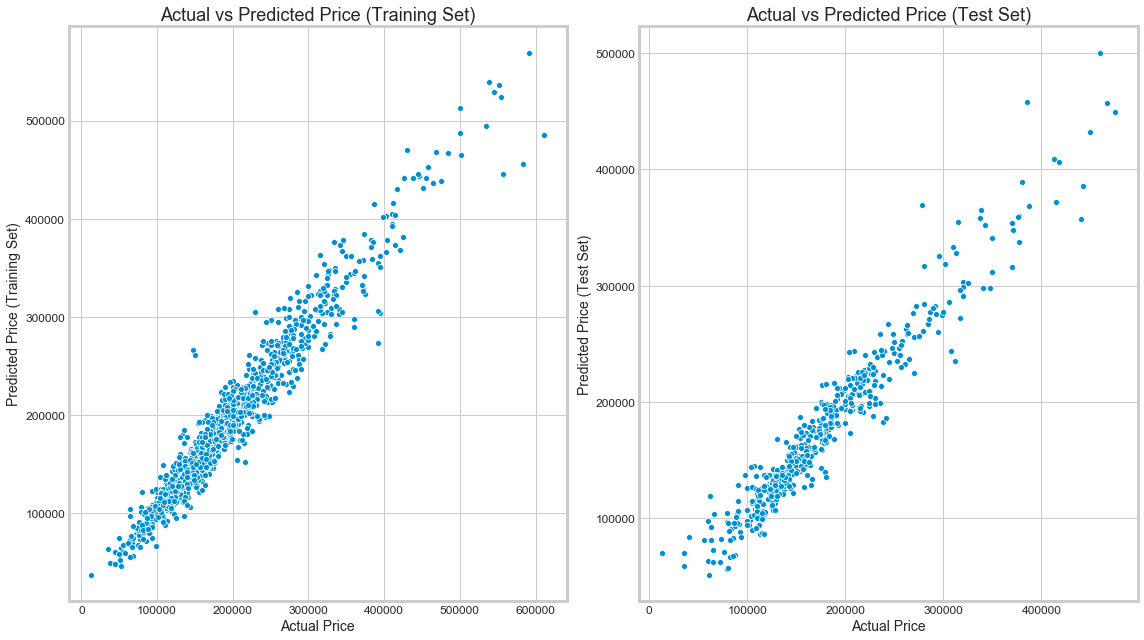

In [177]:
#Scatter plot showing actual price vs predicted price for my test and training sets.
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
sns.scatterplot(np.exp(y_train), y_hat_lasso_train)
plt.xlabel('Actual Price', size = 14)
plt.ylabel('Predicted Price (Training Set)', size = 14)
plt.title('Actual vs Predicted Price (Training Set)', size = 18)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.tight_layout()


plt.subplot(1, 2, 2)
sns.scatterplot(np.exp(y_test), y_hat_lasso_test)
plt.xlabel('Actual Price', size = 14)
plt.ylabel('Predicted Price (Test Set)', size = 14)
plt.title('Actual vs Predicted Price (Test Set)', size = 18)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.tight_layout()


The scatter plots show that the predictions of our model are close to the actual prices. The relationship is linear and almost has a slope of 1 which is what you're looking for. The predicitons on the test data are a little worse than training which we saw with the r^2 scores. Also, the predictions tend to get worse when the actual price of the home is above $300,000.

In [178]:
#Calculating residuals to look for scatter plot analysis
residuals_train = np.exp(y_train) - y_hat_lasso_train
residuals_test = np.exp(y_test) - y_hat_lasso_test

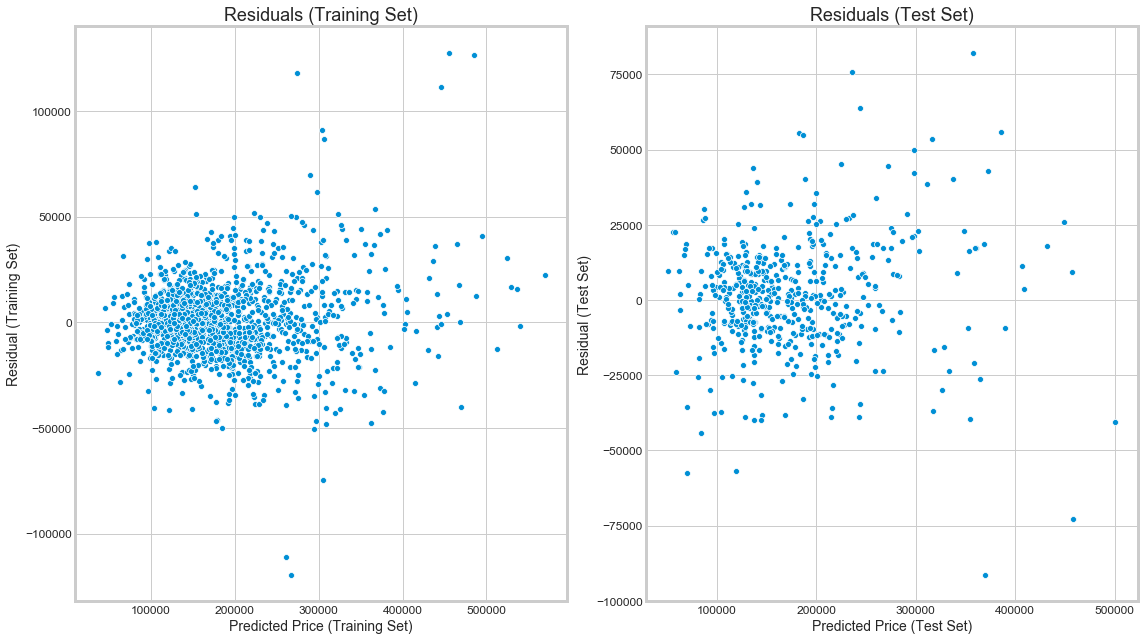

In [179]:
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
sns.scatterplot(y_hat_lasso_train, residuals_train)
plt.xlabel('Predicted Price (Training Set)', size = 14)
plt.ylabel('Residual (Training Set)', size = 14)
plt.title('Residuals (Training Set)', size = 18)
plt.xticks(size = 12)
plt.yticks(size = 12)


plt.subplot(1, 2, 2)
sns.scatterplot(y_hat_lasso_test, residuals_test)
plt.xlabel('Predicted Price (Test Set)', size = 14)
plt.ylabel('Residual (Test Set)', size = 14)
plt.title('Residuals (Test Set)', size = 18)
plt.xticks(size = 12)
plt.yticks(size = 12)

plt.tight_layout();


The residuals for the training set are more centered around 0 than the test set. The test set errors are slightly heteroskedastic. 

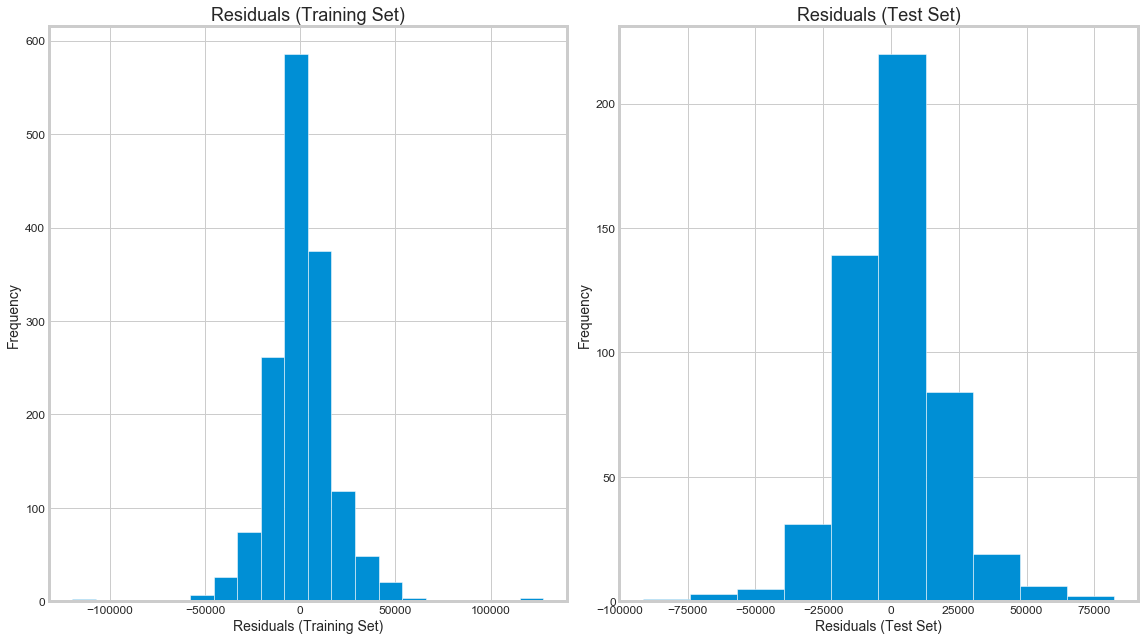

In [180]:
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
plt.hist(residuals_train, bins = 20)
plt.xlabel('Residuals (Training Set)', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Residuals (Training Set)', size = 18)
plt.xticks(size = 12)
plt.yticks(size = 12)

plt.subplot(1, 2, 2)
plt.hist(residuals_test)
plt.xlabel('Residuals (Test Set)', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Residuals (Test Set)', size = 18)
plt.xticks(size = 12)
plt.yticks(size = 12)


plt.tight_layout();

The residuals for the training and test set look to be normal from the histograms above which is what we are looking for in a linear regression model.

In [182]:
# See how regularization played a role in feature selection
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked", sum(coefs != 0),"features and zero-ed out the other",sum(coefs == 0),"features.")

Lasso picked 102 features and zero-ed out the other 113 features.


In [183]:
#Creating a dataframe for all of the lasso coefficients
lasso_coef = pd.DataFrame(lasso.coef_, columns=['coef'])
lasso_coef['name'] = X.columns
lasso_coef['abs_coef'] = np.abs(lasso_coef['coef'])
lasso_coef.sort_values(by = 'coef', ascending = False).head(10)


,coef,name,abs_coef
27,0.095379,Gr Liv Area,0.095379
6,0.077870,Overall Qual,0.077870
211,0.051503,Inside_SF,0.051503
8,0.044511,Year Built,0.044511
7,0.032875,Overall Cond,0.032875
17,0.032710,BsmtFin SF 1,0.032710
36,0.030259,Functional,0.030259
2,0.023960,Lot Area,0.023960
1,0.017021,Lot Frontage,0.017021
34,0.016181,Kitchen Qual,0.016181


In [184]:
#Top 10 lasso coefficients
top_coef = lasso_coef[['coef','name']].sort_values('coef',ascending = False)[:10]

#bottom 10 lasso coefficients
bottom_coef = lasso_coef[['coef', 'name']].sort_values('coef',ascending = False)[-10:]

#Concatenating the results
top_bottom_coef = pd.concat([top_coef,bottom_coef])

top_bottom_coef

,coef,name
27,0.095379,Gr Liv Area
6,0.077870,Overall Qual
211,0.051503,Inside_SF
8,0.044511,Year Built
7,0.032875,Overall Cond
17,0.032710,BsmtFin SF 1
36,0.030259,Functional
2,0.023960,Lot Area
1,0.017021,Lot Frontage
34,0.016181,Kitchen Qual


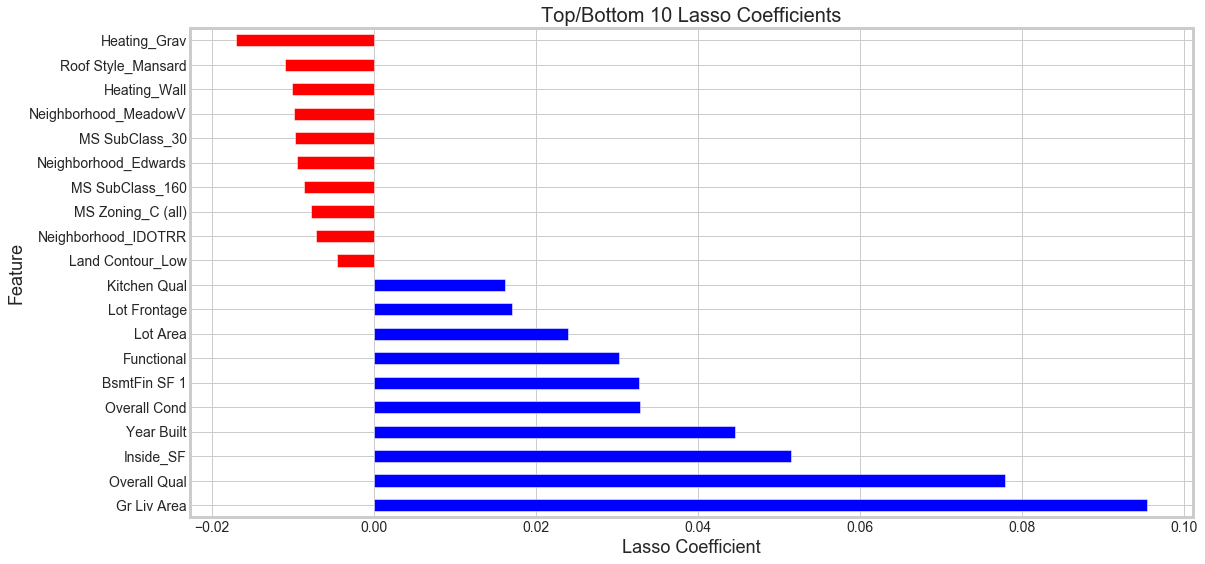

In [185]:
#Creating a chart to show the top/bottom 10 lasso coefficients.
#List of colors for bottom and top 10.
colors = ['red' if c < 0 else 'blue' for c in top_bottom_coef['coef']]
#creating plot
top_bottom_coef.plot(kind = 'barh', x = 'name', y = 'coef', color = colors, legend = False, figsize= (16,9))
plt.xlabel('Lasso Coefficient', size = 18)
plt.ylabel('Feature', size = 18)
plt.title('Top/Bottom 10 Lasso Coefficients', size = 20)
plt.xticks(size = 14)
plt.yticks(size = 14);

Similar to correlations, the top predictors of sale price were mainly related to square footage and quality of a home. The worst predictors were related to the type of dwelling and neighborhood

 ### Prepare in nice format to submit to Kaggle

In [112]:
#Need same features for the test set.
X_kaggle = df_test[feats]

X_kaggle.head()

,PID,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Roof Matl_Roll,Exterior 1st_PreCast,Exterior 2nd_Other,Exterior 2nd_PreCast,Heating_GasA,Sale Type_VWD,Inside_SF,Bsmt Qual * Bsmt Cond,Fireplaces * Fireplace Qu,Garage Area * Garage Cond
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,69.000000,9142,4,4,3,6,8,1910,1950,...,0,0,0,0,1,0,3388,6,0,440
2718,905108090,69.630042,9662,3,4,3,5,4,1977,1977,...,0,0,0,0,1,0,4514,12,0,1740
2414,528218130,58.000000,17104,3,4,3,7,5,2006,2006,...,0,0,0,0,1,0,2576,16,4,1278
1989,902207150,60.000000,8520,4,4,3,5,6,1923,2006,...,0,0,0,0,1,0,2416,9,0,1440
625,535105100,69.630042,9500,3,4,3,6,5,1963,1963,...,0,0,0,0,1,0,3302,12,8,1542


 - Making sure the number and name of columns are the same for the test and training data features.

In [113]:
X.shape

(2040, 215)

In [114]:
X_kaggle.shape

(879, 215)

In [115]:
set(X) - set(X_kaggle)

set()

In [116]:
set(X_kaggle) - set(X)

set()

In [117]:
#scaling the test data for the Kaggle submission
ss_kaggle = StandardScaler()
ss_kaggle.fit(X_kaggle)
X_kaggle_sc = ss_kaggle.transform(X_kaggle)

In [118]:
# Created predicted price on Kaggle test data using created model.
X_kaggle['SalePrice'] = lasso.predict(X_kaggle_sc)
X_kaggle.head()


/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PID,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Exterior 1st_PreCast,Exterior 2nd_Other,Exterior 2nd_PreCast,Heating_GasA,Sale Type_VWD,Inside_SF,Bsmt Qual * Bsmt Cond,Fireplaces * Fireplace Qu,Garage Area * Garage Cond,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,69.000000,9142,4,4,3,6,8,1910,1950,...,0,0,0,1,0,3388,6,0,440,138813.137836
2718,905108090,69.630042,9662,3,4,3,5,4,1977,1977,...,0,0,0,1,0,4514,12,0,1740,163393.937507
2414,528218130,58.000000,17104,3,4,3,7,5,2006,2006,...,0,0,0,1,0,2576,16,4,1278,218071.556854
1989,902207150,60.000000,8520,4,4,3,5,6,1923,2006,...,0,0,0,1,0,2416,9,0,1440,116385.536602
625,535105100,69.630042,9500,3,4,3,6,5,1963,1963,...,0,0,0,1,0,3302,12,8,1542,174254.693489


In [119]:
X_kaggle['SalePrice'].sort_values(ascending = False).head()

Id
2182    594461.054963
1768    556850.463400
433     496248.415430
1761    494743.837022
1064    486249.938264
Name: SalePrice, dtype: float64

In [120]:
#cleaning kaggle submission dataframe to just include ID (row index) and the saleprice
X_kaggle[['SalePrice']].to_csv('./datasets/my_final_submission.csv')


 ## Additional Graphs

In [121]:
#creating a list of the top/bottom 10 correlations with Sale Price
top_correlations = df_train.corr()[['SalePrice']].sort_values('SalePrice', ascending = False)[1:11]
bottom_correlations = df_train.corr()[['SalePrice']].sort_values('SalePrice', ascending = True)[:10]
top_bottom_correlations = pd.concat([top_correlations,bottom_correlations])

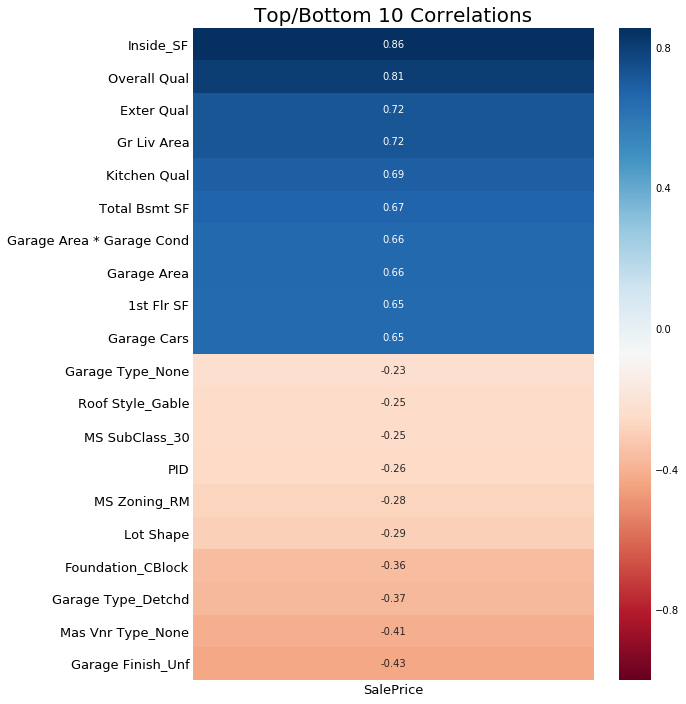

In [122]:
#Looking at heatmap of top/bottom 10 correlations to Sale Price
plt.figure(figsize = (8,12))

sns.heatmap(top_bottom_correlations.sort_values(by = 'SalePrice', ascending = False), 
            annot = True, 
            cmap = 'RdBu',
            vmin = -1)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.title('Top/Bottom 10 Correlations', size = 20);

 - Similar to the data pre-feature engineering, the top positive correlations to sales price are related to square footage and quality/conditon. The most negataive correlation was an unfinished garage.

In [123]:
#Brining in the unedited training data set for more visual analysis.
df_train_practice = pd.read_csv('./datasets/train.csv')

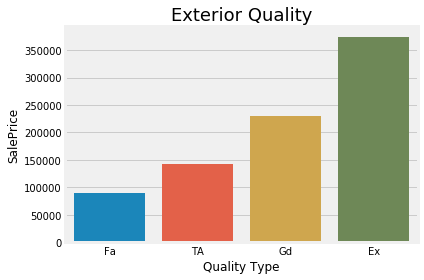

In [125]:
#Creating graph for Exterior quality sorted from least to greatest by average sale price.
plt.title('Exterior Quality', size = 18)
plt.ylabel("Sale Price", size = 12)
sns.barplot(x = "Exter Qual", y = "SalePrice", data = df_train_practice, 
            ci = False,
            order = ['Fa', 'TA', 'Gd', 'Ex']
           ).set_xlabel('Quality Type', size = 12)
plt.tight_layout()
plt.show();

 - Higher the quality of a home, the higher the sale price.

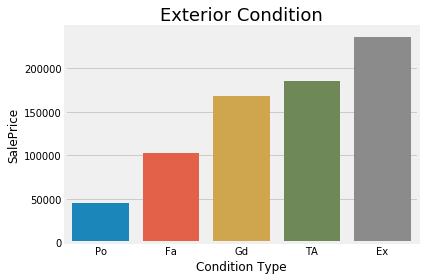

In [126]:
#Creating graph for Exterior conditon sorted from least to greatest by average sale price.
plt.title('Exterior Condition', size = 18)
plt.ylabel("Sale Price", size = 12)
sns.barplot(x = "Exter Cond", 
            y = "SalePrice", 
            data = df_train_practice, 
            ci = False,
           order = ['Po', 'Fa', 'Gd', 'TA', 'Ex']
           ).set_xlabel('Condition Type', size = 12)
plt.tight_layout()
plt.show();

 - The better condition of the exterior of the home, the higher the sale price. 

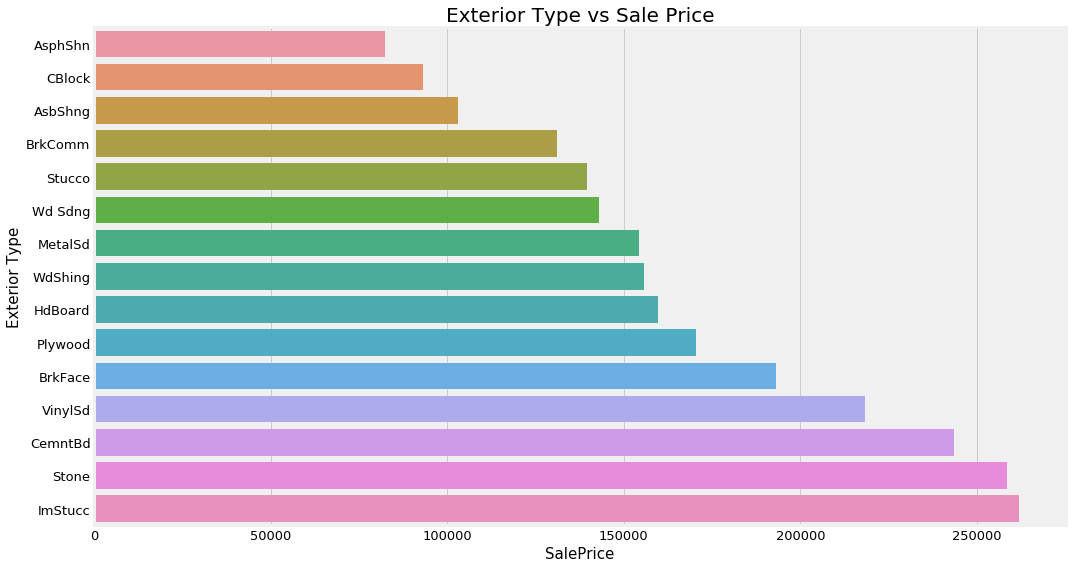

In [127]:
#creating a list of values for exterior type sorted from least to greatest avg. sale price.
exterior_1st_df = pd.DataFrame(df_train_practice.groupby('Exterior 1st')['SalePrice'].mean().sort_values())
exteriort_1st_list = list(exterior_1st_df.index.values)

#Creating a bar chart of the results
plt.figure(figsize=(15,8))
plt.title('Exterior Type vs Sale Price', size = 20)
plt.xlabel("Sale Price", size = 15)
sns.barplot(y = "Exterior 1st",
            x = "SalePrice",
            data = df_train_practice,
            order = exteriort_1st_list,
            ci = False,
           orient = 'h',
          ).set_ylabel('Exterior Type',size = 15)

plt.xticks(size = 13)
plt.yticks(size = 13)
plt.tight_layout()
plt.show();

 - Houses made of cement, stone or imitation stucco had the highest average sales price in Ames, Iowa.

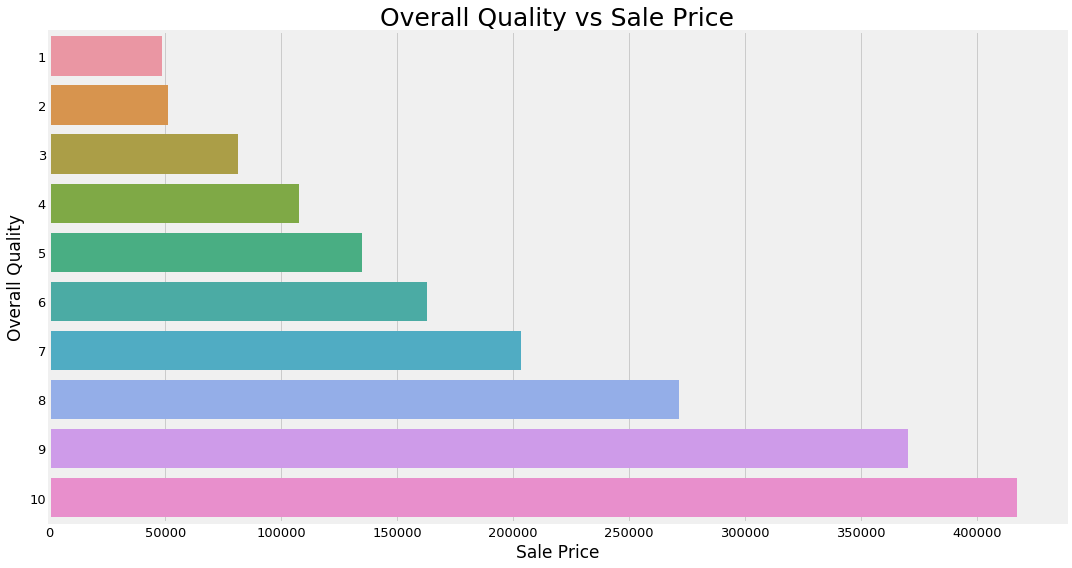

In [128]:
#creating a list of values for overall quality sorted from least to greatest avg. sale price.
overall_qual_df = pd.DataFrame(df_train_practice.groupby('Overall Qual')['SalePrice'].mean().sort_values())
overall_qual_list = list(overall_qual_df.index.values)


#Creating a bar chart of the results
plt.figure(figsize=(15,8))
plt.title('Overall Quality vs Sale Price', size = 25)

sns.barplot(y = "Overall Qual",
            x = "SalePrice",
            data = df_train_practice,
            order = overall_qual_list,
            ci = False,
           orient = 'h',
          ).set_ylabel('Overall Quality',size = 17)

plt.xlabel("Sale Price", size = 17)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.tight_layout()
plt.show();

 - As overall quality increases, so does sale price.

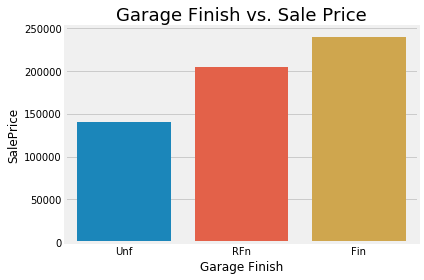

In [129]:
plt.title('Garage Finish vs. Sale Price', size = 18)
plt.ylabel("Sale Price", size = 12)
sns.barplot(x = "Garage Finish", 
            y = "SalePrice", 
            data = df_train_practice, 
            ci = False,
            order = ['Unf', 'RFn', 'Fin']
           ).set_xlabel('Garage Finish', size = 12)
plt.tight_layout()

plt.show();

 - Finished garages are associated with higher sales prices.

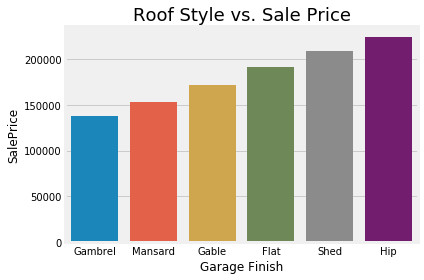

In [130]:
# Barplot of the roof styles in Ames from least to greatest avg. sale price.
plt.title('Roof Style vs. Sale Price', size = 18)
plt.ylabel("Sale Price", size = 12)
sns.barplot(x = "Roof Style", 
            y = "SalePrice", 
            data = df_train_practice, 
            ci = False,
            order = ['Gambrel', 'Mansard', 'Gable', 'Flat', 'Shed', 'Hip']
           ).set_xlabel('Garage Finish', size = 12)
plt.tight_layout()

plt.show();

 - Hip and shed roofs are associated with higher sales prices. These are the most stable roofs and can better handle extreme weather. There are lots of tornadoes in Iowa.

## Conclusions and Recommendations

After cleaning, perfoming EDA, preprocessing and modeling the data, I was able to build a model that could capture over 90% of the variability in sales price for homes sold in Ames, Iowa between 2006-2010. My root mean squared error for the Kaggle test data was approximately $26,000. 

The model I used was a lasso linear regression model. This model had the best root mean squared error and was not overfit. The features that predicted sales price the best were related to square footage and quality/condition of the home.

A real estate broker or potential home seller can use my model to accurately predict a baseline listing price for his/her home so they can get the most value and so it sells in a reasonable amount of time. The model can also be used to increase the value of a home. A homeowner can focus on improving some of the features that are highly positively correlated with sales price and removing features that are negatively correlated. 

An area of concern in my model is the collinearity of features that are being utilized. Ideally, all the features within a model will be independent. Another concern are the categories for the ordinal variables. I am unsure how those scales were created or chosen for each home. I would also like to have seen data more recent than 2010. The dataset I examined could have been from the 2008 recession which took a big toll on real estate prices.

Overall, the model I created is very useful for prediciting home prices in Ames, Iowa. Other cities in the US would require additional data and analysis.